In [14]:
# Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [48]:
#read cvs file
#df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df_soiltype = pd.read_csv('../dataset/processed/crop_soiltype_data_0.csv')

# Display the first 5 rows
df_soiltype.head()

,Date,Crop_Type,Soil_pH,N,P,K,Soil_Quality,Crop_Yield,Year,Month,Day
0,2014-01-01,Wheat,5.50,60.5,45.0,31.5,22.833333,0.000000,2014,1,1
1,2014-01-01,Corn,6.50,84.0,66.0,50.0,66.666667,104.871310,2014,1,1
2,2014-01-01,Rice,5.50,71.5,54.0,38.5,27.333333,0.000000,2014,1,1
3,2014-01-01,Barley,6.75,50.0,40.0,30.0,35.000000,58.939796,2014,1,1
4,2014-01-01,Soybean,5.50,49.5,45.0,38.5,22.166667,32.970413,2014,1,1


In [45]:
print(df_soiltype.isnull().sum())

Date                        0
Crop_Type                   0
Soil_pH                     0
N                           0
P                           0
K                           0
Soil_Quality                0
Crop_Yield                  0
Year                        0
Month                       0
Day                         0
pH_bin                      0
Soil_Quality_Category    7361
dtype: int64


In [46]:
#Print data info (data types, non-null counts, memory usage)
print(df_soiltype.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   36520 non-null  object  
 1   Crop_Type              36520 non-null  object  
 2   Soil_pH                36520 non-null  float64 
 3   N                      36520 non-null  float64 
 4   P                      36520 non-null  float64 
 5   K                      36520 non-null  float64 
 6   Soil_Quality           36520 non-null  float64 
 7   Crop_Yield             36520 non-null  float64 
 8   Year                   36520 non-null  int64   
 9   Month                  36520 non-null  int64   
 10  Day                    36520 non-null  int64   
 11  pH_bin                 36520 non-null  category
 12  Soil_Quality_Category  29159 non-null  category
dtypes: category(2), float64(6), int64(3), object(2)
memory usage: 3.1+ MB
None


In [18]:
# Display summary statistics for numerical columns
print(df_soiltype.describe())

            Soil_pH             N             P            K  Soil_Quality  \
count  36520.000000  36520.000000  36520.000000  36520.00000  36520.000000   
mean       6.602731     66.011035     53.014006     42.01825     37.516632   
std        0.816973     10.886721      8.812884      8.53781     17.703171   
min        5.500000     45.000000     36.000000     27.00000     13.291667   
25%        6.250000     58.500000     45.000000     35.00000     22.500000   
50%        6.500000     65.000000     54.000000     42.00000     35.583333   
75%        6.750000     71.500000     60.000000     49.50000     49.291667   
max        8.000000     91.000000     72.000000     60.00000     74.333333   

         Crop_Yield          Year         Month           Day  
count  36520.000000  36520.000000  36520.000000  36520.000000  
mean      26.878480   2018.499726      6.523549     15.727820  
std       25.740936      2.871939      3.448580      8.799445  
min        0.000000   2014.000000      1.

In [19]:
# Group the data by Crop_Type and Year, then calculate the average Crop_Yield
grouped = df_soiltype.groupby(['Crop_Type', 'Year'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type  Year  Crop_Yield
0    Barley  2014   24.932251
1    Barley  2015   24.955955
2    Barley  2016   24.531108
3    Barley  2017   26.245359
4    Barley  2018   24.827279


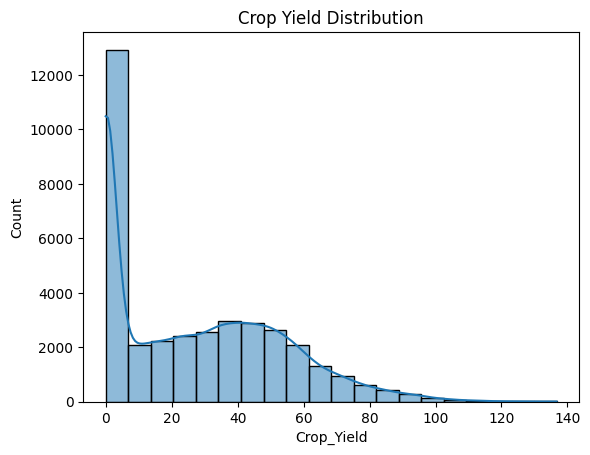

In [47]:
#Crop Yield distribution
sns.histplot(df_soiltype['Crop_Yield'], kde=True, bins=20)
plt.title("Crop Yield Distribution")
plt.show()

### Insights from the graph
1. The Crop_Yield data is highly skewed, with a very large proportion of values equal to zero.

Text(0, 0.5, 'Average Crop Yield')

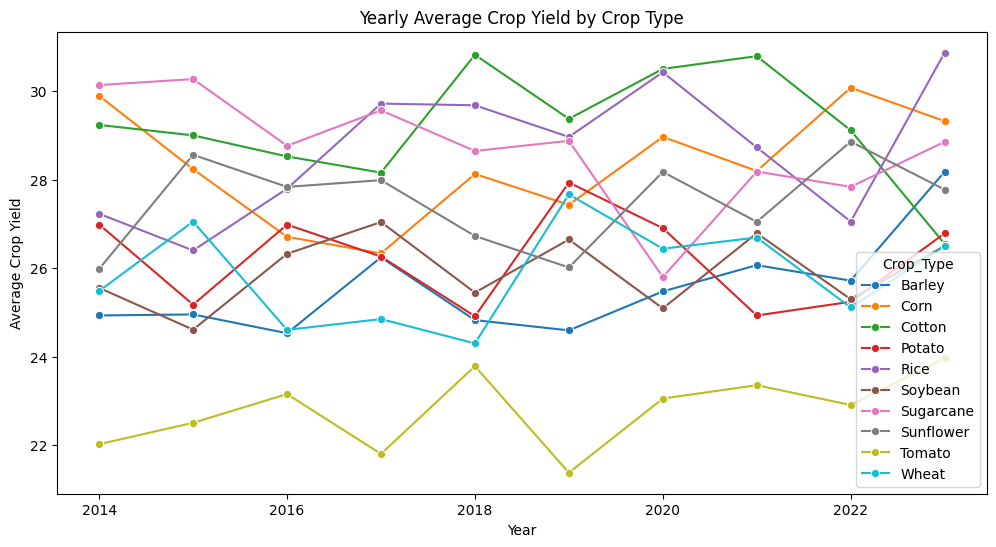

In [21]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a line chart showing average crop yield per year by crop type
sns.lineplot(data=grouped, x='Year', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Yearly Average Crop Yield by Crop Type")
plt.xlabel("Year")
plt.ylabel("Average Crop Yield")

### Insights from the graph
1. Among the different crop types, cotton shows one of the highest average yields.
2. Among the various crop types, tomato shows one of the lowest average yields.
3. The trend in crop yield varies by crop type, with certain crops experiencing growth and others showing a downward trend during the same period. 
**Further analysis is needed to understand which factors are contributing to the variation in crop yield.**

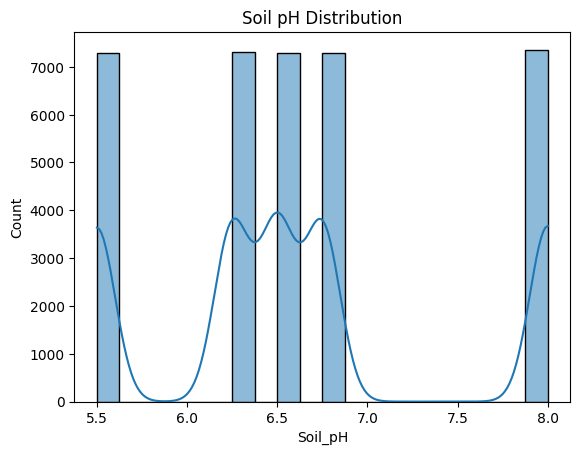

In [22]:
# Data Distribution
# Visualizes the distribution of soil pH values
# Soil pH distribution 
sns.histplot(df_soiltype['Soil_pH'], kde=True, bins=20)
plt.title("Soil pH Distribution")
plt.show()


C:\Users\james\AppData\Local\Temp\ipykernel_16992\209558994.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_soiltype.groupby(['pH_bin', 'Crop_Type'])['Crop_Yield'].mean().reset_index()


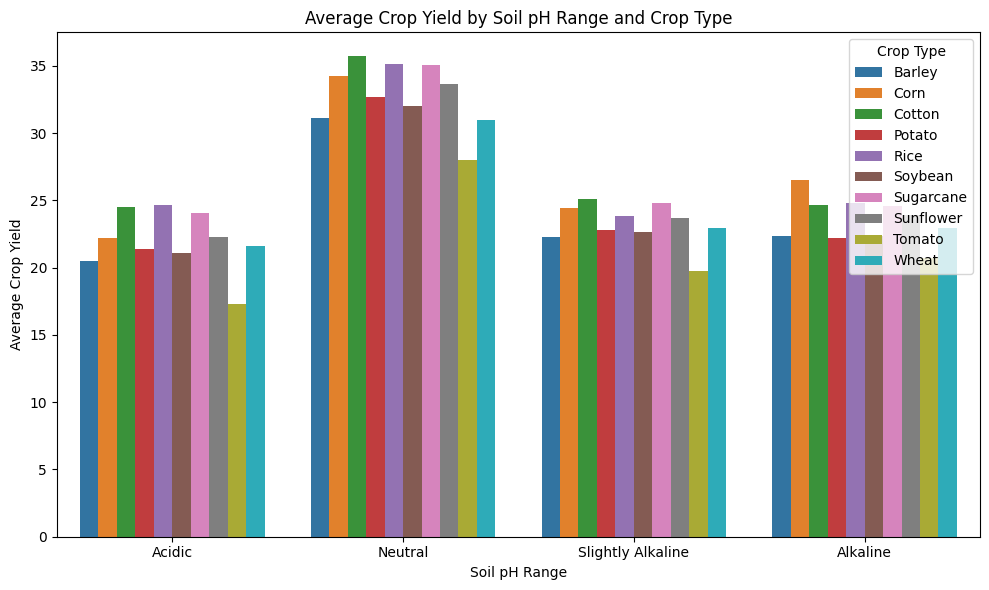

In [23]:
# Bin Soil_pH into categorical ranges
df_soiltype['pH_bin'] = pd.cut(df_soiltype['Soil_pH'], bins=[0, 5.5, 6.5, 7.5, 9],
                      labels=['Acidic', 'Neutral', 'Slightly Alkaline', 'Alkaline'])

# Group by Crop_Type and pH range
grouped = df_soiltype.groupby(['pH_bin', 'Crop_Type'])['Crop_Yield'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='pH_bin', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Crop Yield by Soil pH Range and Crop Type")
plt.xlabel("Soil pH Range")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.tight_layout()
plt.show()

### Insights from the graph
1. In the case of Neutral soil quality, crop yields are generally higher compared to other categories, while the remaining 
   soil quality categories show relatively similar yield levels.

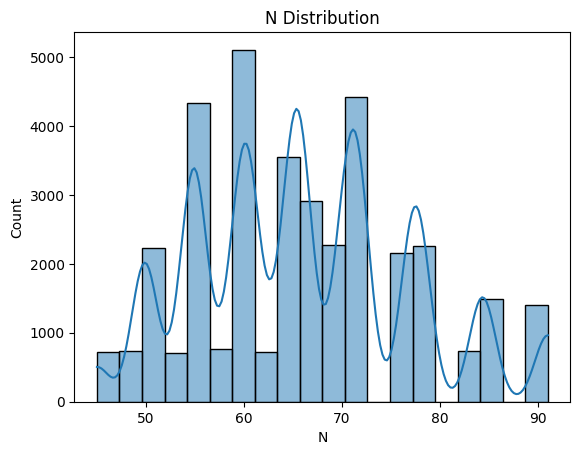

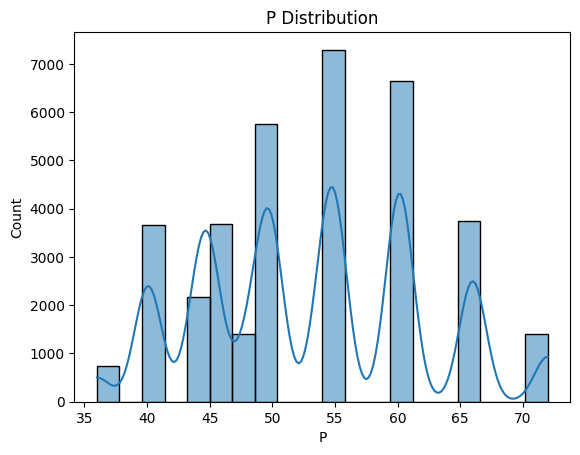

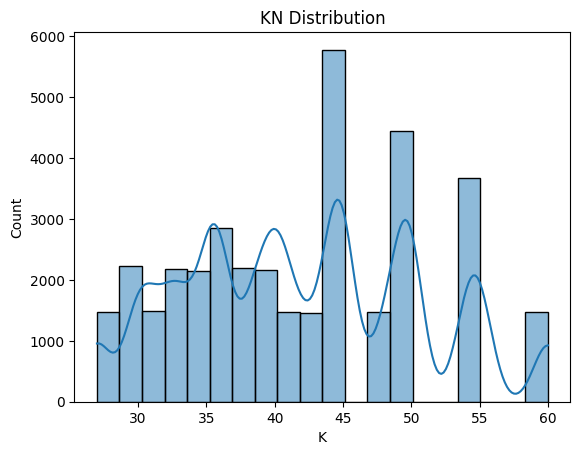

In [24]:
# Data Distribution
# Visualizes the distribution of soil pH values
# Nitrogen distribution 
sns.histplot(df_soiltype['N'], kde=True, bins=20)
plt.title("N Distribution")
plt.show()

# P (Phosphorus) distribution
sns.histplot(df_soiltype['P'], kde=True, bins=20)
plt.title("P Distribution")
plt.show()

# K (Potassium) distribution
sns.histplot(df_soiltype['K'], kde=True, bins=20)
plt.title("KN Distribution")
plt.show()


### Insights from the graph
1. Maximum Values by Nutrient Variable
    - Nitrogen (N): 60
    - Phosphorus (P): 55
    - Potassium (K): 49

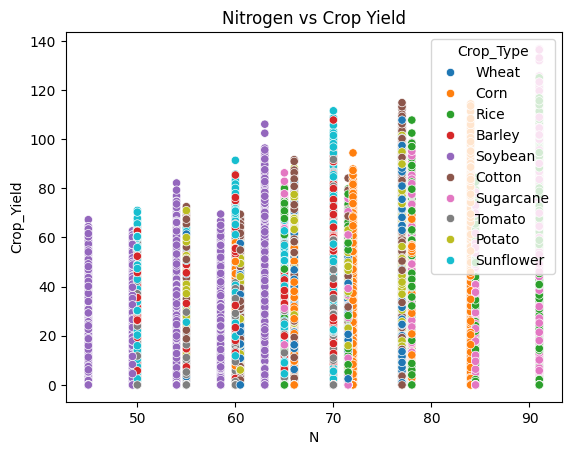

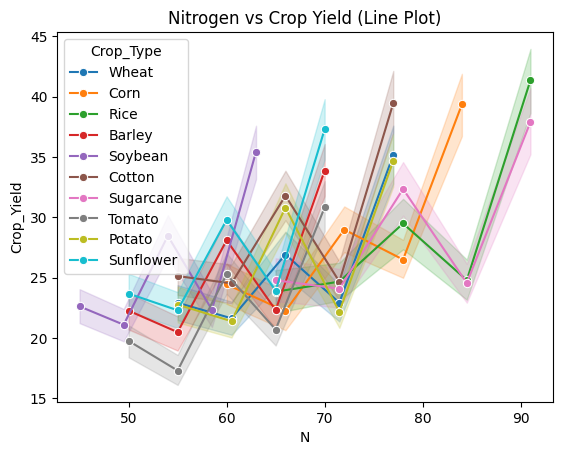

In [25]:
#Soil Nutrients Effect
# N (Nitrogen) vs Crop Yield
sns.scatterplot(data=df_soiltype, x='N', y='Crop_Yield', hue='Crop_Type')
plt.title("Nitrogen vs Crop Yield")
plt.show()

# Group by N (optional: bin N into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df_soiltype, x='N', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Nitrogen vs Crop Yield (Line Plot)")
plt.show()

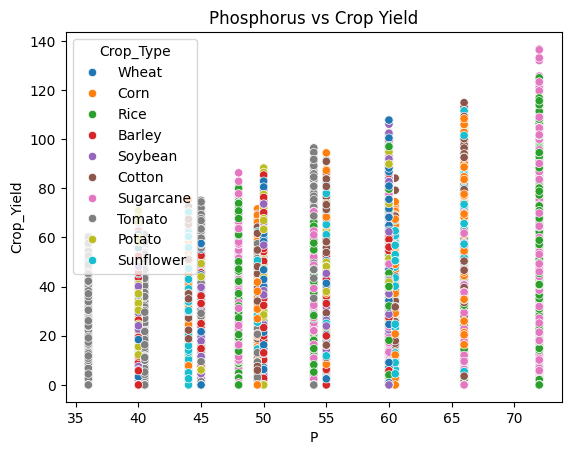

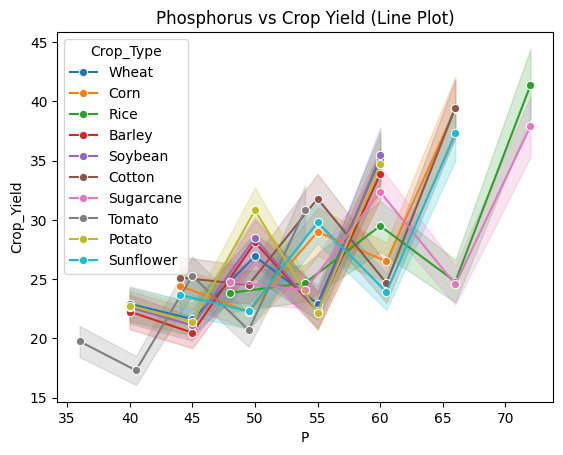

In [26]:
# Soil Nutrients Effect
# P (Phosphorus) vs Crop Yield
sns.scatterplot(data=df_soiltype, x='P', y='Crop_Yield', hue='Crop_Type')
plt.title("Phosphorus vs Crop Yield")
plt.show()

# Group by N (optional: bin P into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df_soiltype, x='P', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Phosphorus vs Crop Yield (Line Plot)")
plt.show()

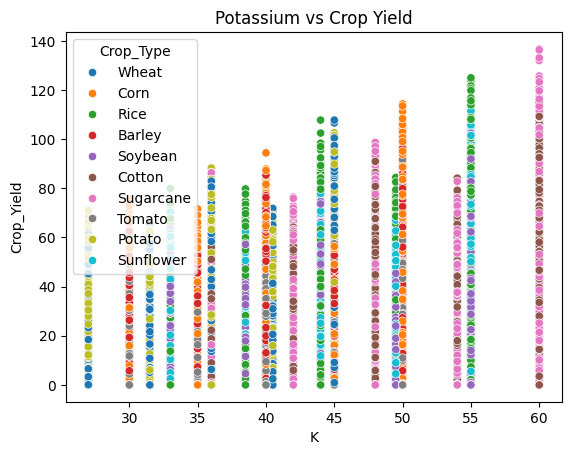

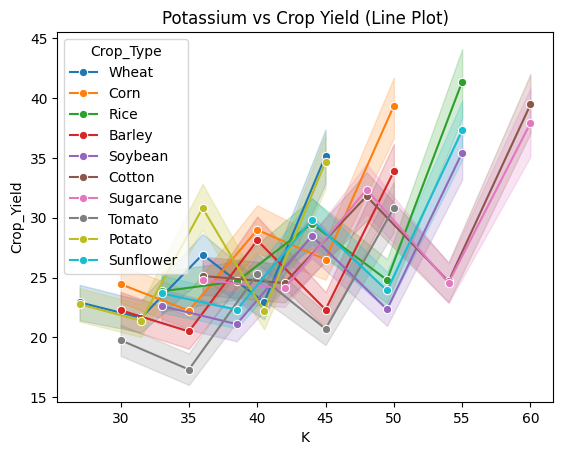

In [27]:
#Soil Nutrients Effect
# K (Potassium) vs Crop Yield
sns.scatterplot(data=df_soiltype, x='K', y='Crop_Yield', hue='Crop_Type')
plt.title("Potassium vs Crop Yield")
plt.show()

# Group by N (optional: bin P into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df_soiltype, x='K', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Potassium vs Crop Yield (Line Plot)")
plt.show()

### Insights from the graph
1. Higher nitrogen content is associated with an increase in crop yield.
2. Nitrogen (N) shows a strong positive correlation with crop yield. When N exceeds 80, yields increase sharply, especially 
   for corn, cotton, and sunflower, while tomato remains comparatively low.
3. Phosphorus (P) is positively correlated with crop yield. When P exceeds 60, most crops, including wheat, corn, cotton, and 
   sugarcane, show significant increases in yield, reaching their highest levels around 65–70.”
4. Potassium (K) shows a strong positive correlation with crop yield. When K exceeds 55, yields increase sharply, 
   especially for corn, rice, and cotton.

In [28]:
# Soil_Quality analysis in progress
# Group by Soil_Quality and calculate mean Crop_Yield
mean_yield = df_soiltype.groupby('Soil_Quality')['Crop_Yield'].mean().reset_index()
print(mean_yield)

    Soil_Quality  Crop_Yield
0      13.291667   20.706134
1      13.583333   22.342513
2      13.750000   22.316986
3      13.916667   22.541469
4      14.583333   23.918119
5      15.291667   26.505049
6      15.500000   24.672766
7      16.666667   24.794115
8      17.041667   24.560944
9      21.750000   17.307204
10     22.166667   21.103041
11     22.500000   20.488184
12     22.833333   21.511164
13     23.833333   22.299317
14     25.083333   22.229097
15     25.333333   24.532260
16     27.333333   24.674342
17     27.916667   24.088898
18     33.833333   19.764205
19     34.416667   22.623234
20     35.000000   22.268281
21     35.583333   22.849836
22     37.041667   23.683389
23     39.083333   24.444853
24     39.375000   25.134347
25     42.291667   25.281782
26     42.583333   23.840780
27     43.166667   28.469803
28     43.458333   24.788939
29     43.750000   28.106810
30     44.333333   28.861849
31     46.375000   29.796100
32     48.708333   28.986975
33     49.2916

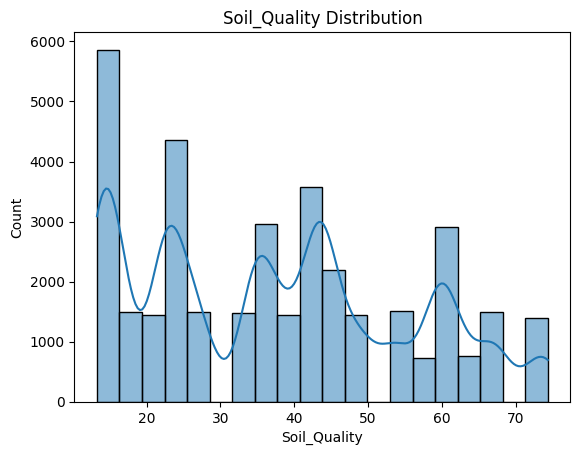

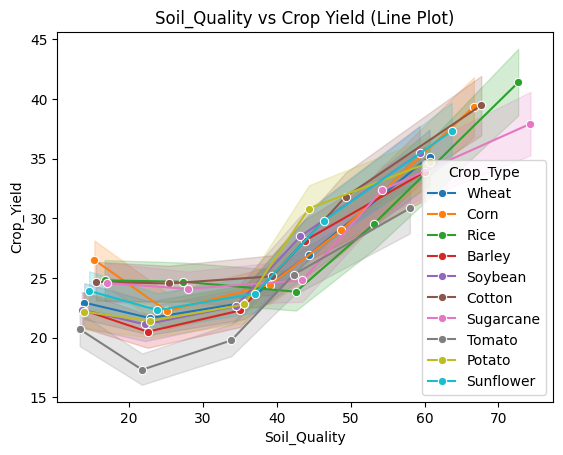

In [29]:
# Soil_Quality distribution 
sns.histplot(df_soiltype['Soil_Quality'], kde=True, bins=20)
plt.title("Soil_Quality Distribution")
plt.show()

# Plot the relationship between Soil_Quality and Crop_Yield for each Crop_Type
sns.lineplot(data=df_soiltype, x='Soil_Quality', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Soil_Quality vs Crop Yield (Line Plot)")
plt.show()

### Insights from the graph
1. The distribution of soil quality is skewed toward lower values, with notable peaks around 15, 25, 40, and 60, while 
   higher soil quality scores above 65 are less frequent.
2. Soil quality has a strong positive correlation with crop yield. When soil quality exceeds 50, crop yields increase 
   significantly, especially for cotton, corn, wheat, and rice, while lower soil quality results in reduced productivity 
   across all crops.

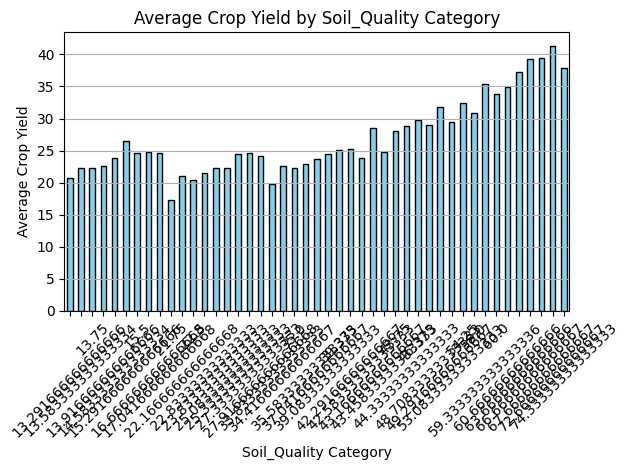

In [30]:
# Group by temperature category and calculate mean yield
mean_yield = df_soiltype.groupby('Soil_Quality')['Crop_Yield'].mean()

# Plot bar chart
mean_yield.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Crop Yield by Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.xlabel('Soil_Quality Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\james\AppData\Local\Temp\ipykernel_16992\863281824.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


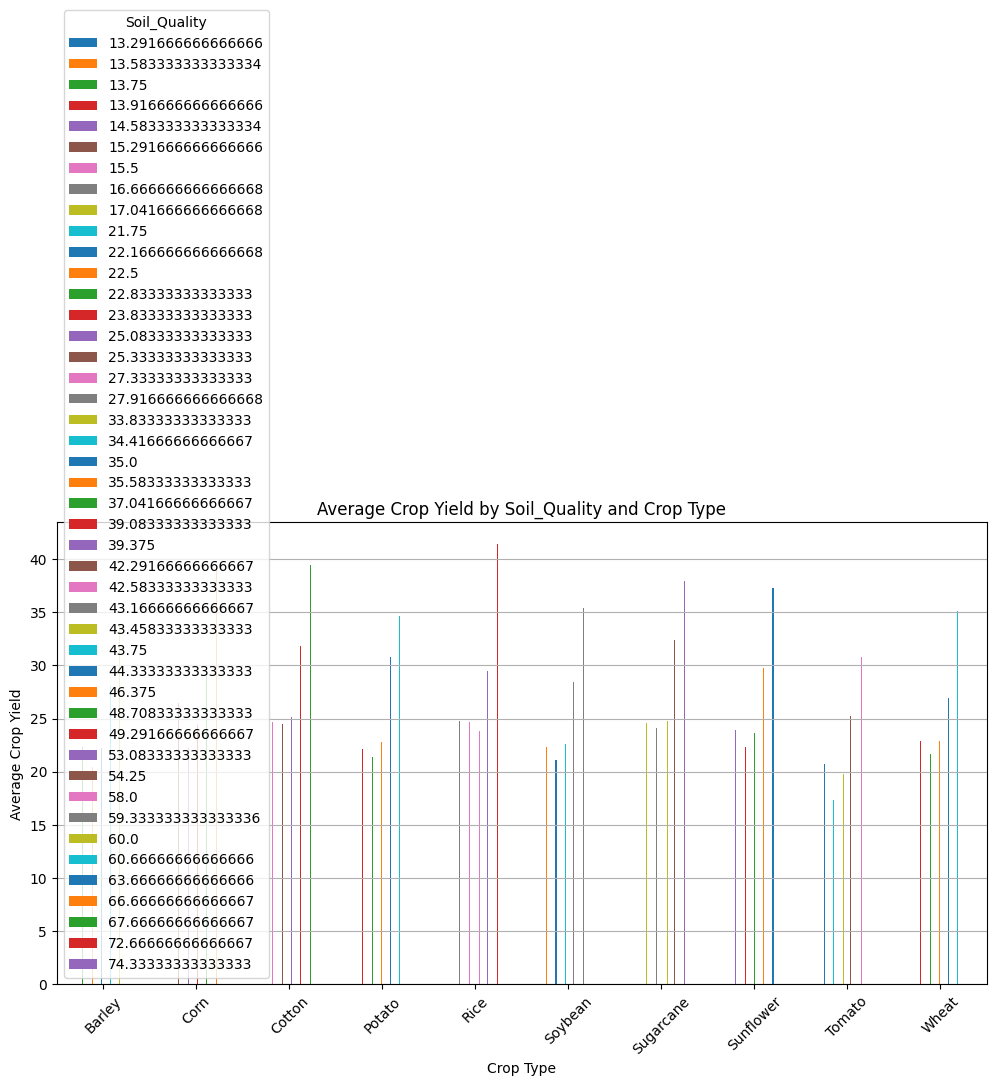

In [31]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df_soiltype.groupby(['Crop_Type', 'Soil_Quality'])['Crop_Yield'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

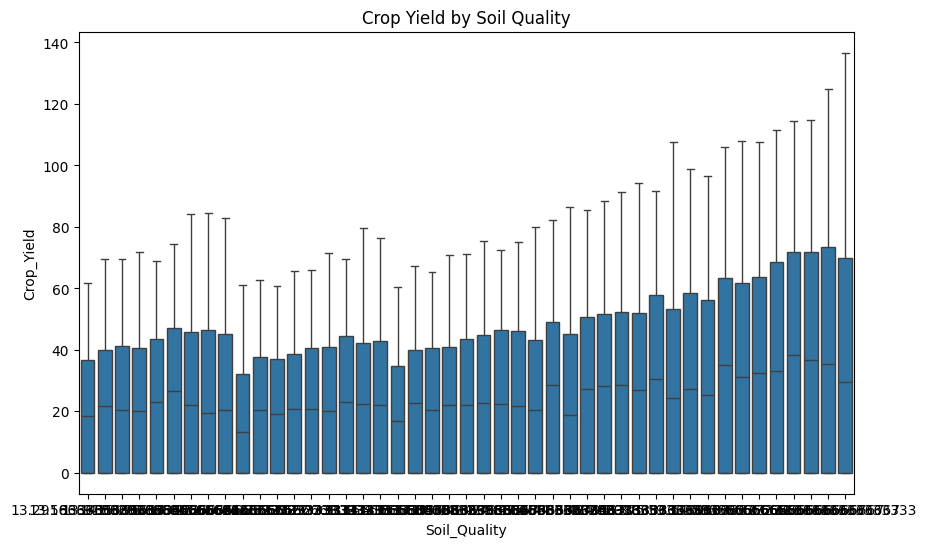

In [32]:
# Create a boxplot to compare Crop_Yield distribution across different Soil_Quality categories
plt.figure(figsize=(10,6))
sns.boxplot(data=df_soiltype, x='Soil_Quality', y='Crop_Yield')
plt.title("Crop Yield by Soil Quality")
plt.show()

### Insights from the graph
1. Since the Soil_Quality values were not clearly distinguishable, they were divided into ranges.

In [33]:
# Bin Soil_Quality into categories (Low, Medium, High)
#bins = [0, 30, 60, 100]  # 0-30 = Low, 30-60 = Medium, 60-100 = High
#labels = ['Low', 'Medium', 'High']

bins = [ 20, 40, 50, 60, 70, 80] # 0~10, 10~20, 20~30, 30~40
labels = ['Very Low Quality', 'Low Quality', 'Medium Quality', 'High Quality', 'Very High Quality']

df_soiltype['Soil_Quality_Category'] = pd.cut(df_soiltype['Soil_Quality'], 
                                              bins=bins, labels=labels, include_lowest=True)
print(df_soiltype.groupby('Soil_Quality_Category')['Crop_Yield'].mean())

Soil_Quality_Category
Very Low Quality     22.413038
Low Quality          27.885021
Medium Quality       32.387883
High Quality         37.246487
Very High Quality    39.610959
Name: Crop_Yield, dtype: float64


C:\Users\james\AppData\Local\Temp\ipykernel_16992\3318564195.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_soiltype.groupby('Soil_Quality_Category')['Crop_Yield'].mean())


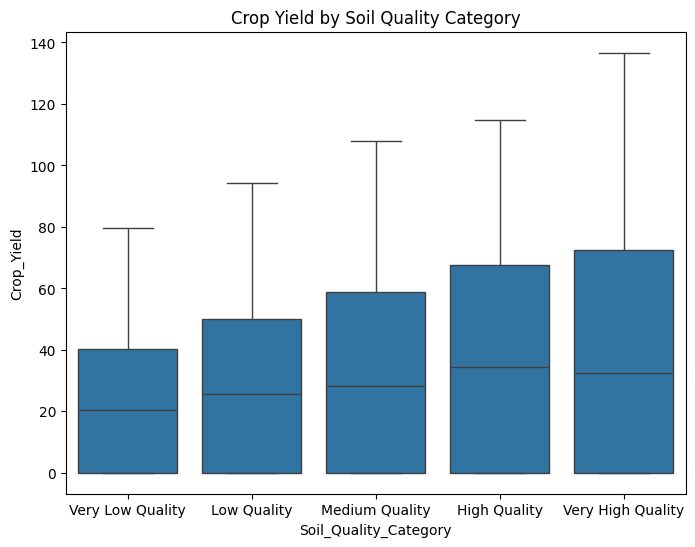

In [34]:
# Boxplot: Spread and Outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=df_soiltype, x='Soil_Quality_Category', y='Crop_Yield')
plt.title("Crop Yield by Soil Quality Category")
plt.show()

### Insights from the graph
1. Crop yield increases as soil quality category improves from Low to High. While variability also grows, 
   the highest productivity is consistently observed in the High soil quality group.

In [35]:
# Example: Remove outliers using the IQR method
# Calculate Q1 (25th percentile)
Q1 = df_soiltype['Soil_Quality'].quantile(0.25)
# Calculate Q3 (75th percentile)
Q3 = df_soiltype['Soil_Quality'].quantile(0.75)
IQR = Q3 - Q1
# Print values for inspection
print("Q1 (25th percentile):", Q1)  
print("Q3 (75th percentile):", Q3)  
print("IQR (Q3 - Q1):", IQR)        

Q1 (25th percentile): 22.5
Q3 (75th percentile): 49.29166666666667
IQR (Q3 - Q1): 26.79166666666667


In [36]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -17.687500000000007
Upper Bound: 89.47916666666669


In [37]:
# Remove outliers from Soil_Quality using IQR
# Filter rows within the acceptable range
df_soiltype_cleaned = df_soiltype[(df_soiltype['Soil_Quality'] >= Q1 - 1.5 * IQR) & 
                 (df_soiltype['Soil_Quality'] <= Q3 + 1.5 * IQR)]

print(df_soiltype_cleaned)
# Count of rows after cleaning
print("Remaining rows:", len(df_soiltype))
print("Removed outliers:", len(df_soiltype) - len(df_soiltype_cleaned))

             Date  Crop_Type  Soil_pH     N     P     K  Soil_Quality  \
0      2014-01-01      Wheat     5.50  60.5  45.0  31.5     22.833333   
1      2014-01-01       Corn     6.50  84.0  66.0  50.0     66.666667   
2      2014-01-01       Rice     5.50  71.5  54.0  38.5     27.333333   
3      2014-01-01     Barley     6.75  50.0  40.0  30.0     35.000000   
4      2014-01-01    Soybean     5.50  49.5  45.0  38.5     22.166667   
...           ...        ...      ...   ...   ...   ...           ...   
36515  2023-12-31     Cotton     6.25  66.0  55.0  48.0     49.291667   
36516  2023-12-31  Sugarcane     5.50  71.5  54.0  42.0     27.916667   
36517  2023-12-31     Tomato     6.75  50.0  36.0  30.0     33.833333   
36518  2023-12-31     Potato     5.50  60.5  45.0  31.5     22.833333   
36519  2023-12-31  Sunflower     6.25  60.0  55.0  44.0     46.375000   

       Crop_Yield  Year  Month  Day             pH_bin Soil_Quality_Category  
0        0.000000  2014      1    1         

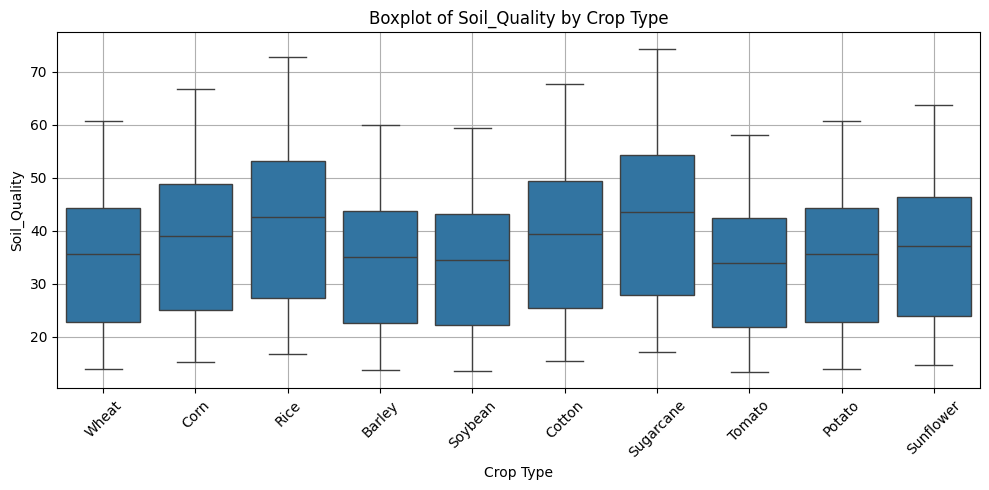

In [38]:
# Create a boxplot to compare the distribution of Soil_Quality across different Crop_Type categories
plt.figure(figsize=(10, 5))
sns.boxplot(x='Crop_Type', y='Soil_Quality', data=df_soiltype_cleaned)

plt.title('Boxplot of Soil_Quality by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Soil_Quality')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from the graph
1. The boxplot analysis indicates that rice, sugarcane, and cotton are generally grown in higher soil quality conditions, 
   while crops such as tomato, potato, and soybean are associated with lower soil quality. Variability is also higher 
   for rice and sugarcane, suggesting a broader range of soil conditions.

C:\Users\james\AppData\Local\Temp\ipykernel_16992\4223778495.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_soiltype_cleaned.groupby(['Crop_Type', 'Soil_Quality_Category'])['Crop_Yield'].mean().unstack()


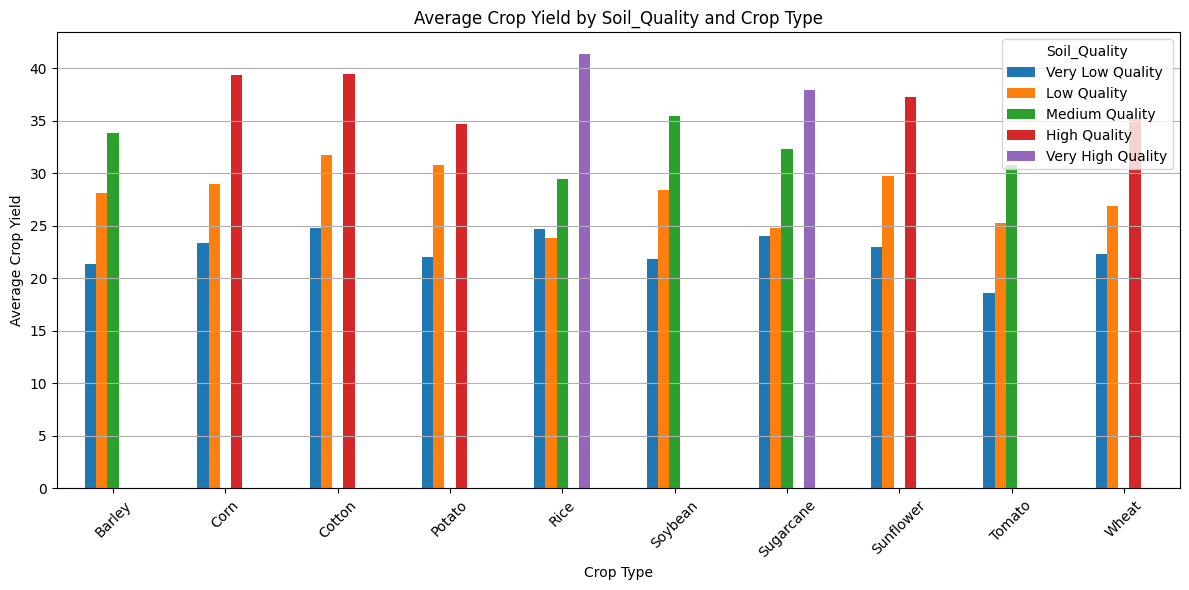

In [39]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df_soiltype_cleaned.groupby(['Crop_Type', 'Soil_Quality_Category'])['Crop_Yield'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

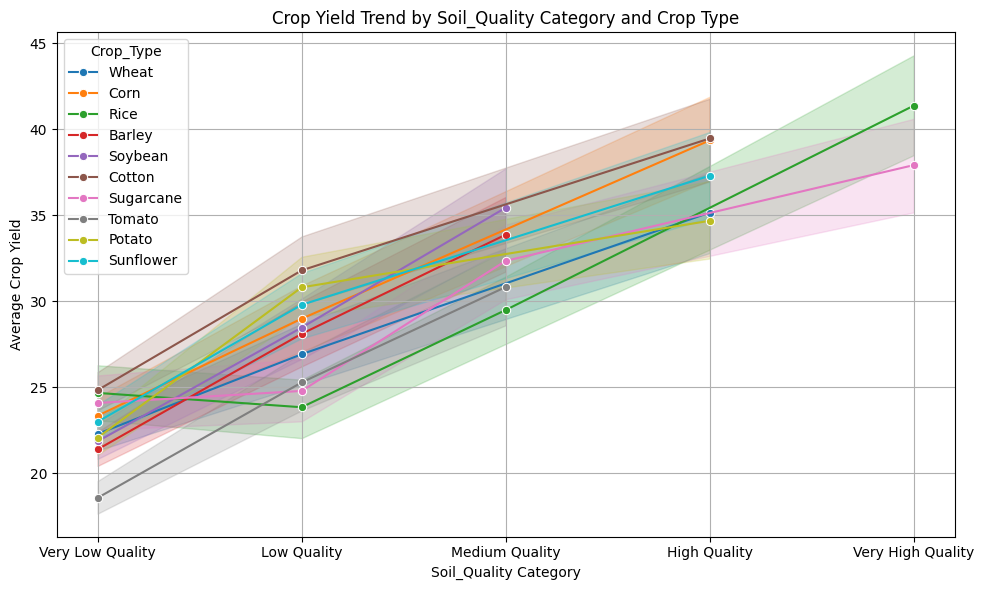

In [40]:
plt.figure(figsize=(10, 6))
# Seaborn lineplot: Crop_Yield by Crop_Type and Temp_Category
sns.lineplot(data=df_soiltype_cleaned, x='Soil_Quality_Category', y='Crop_Yield', hue='Crop_Type', marker='o')

plt.title('Crop Yield Trend by Soil_Quality Category and Crop Type')
plt.xlabel('Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

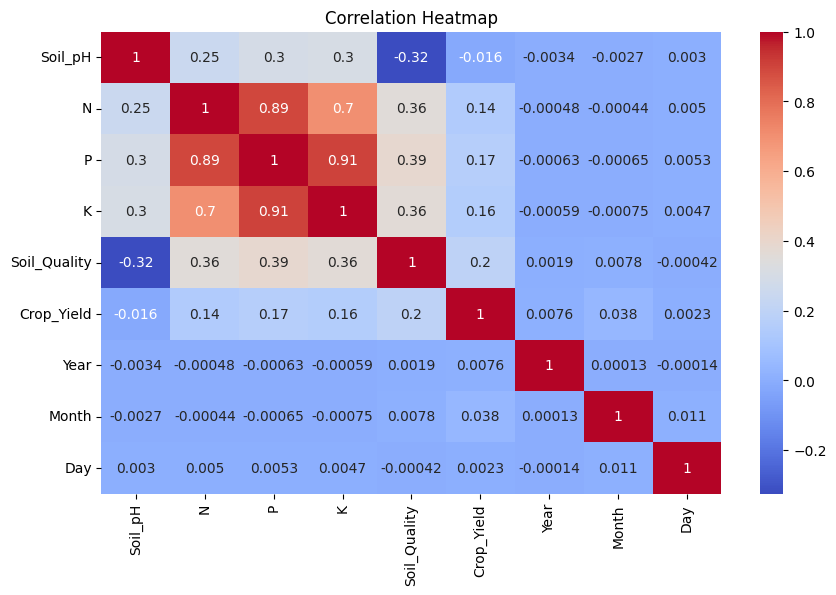

In [ ]:


# Relationship Analysis
# Select only numeric columns
numeric_df = df_soiltype_cleaned.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Key Findings
1. Strong correlations (r > 0.7)
 - P (Phosphorus) ↔ K (Potassium): 0.91 → very strong positive correlation
 - N (Nitrogen) ↔ P: 0.89 → very strong positive correlation
 - N ↔ K: 0.70 → strong positive correlation
**Indicates that N, P, and K are closely linked soil nutrient factors that tend to vary together.**

2. Moderate correlations (r ≈ 0.3–0.4)
 - Soil_Quality ↔ P: 0.39
 - Soil_Quality ↔ N: 0.36
 - Soil_Quality ↔ K: 0.36
**Soil quality shows a moderate correlation with nutrient levels (N, P, K).**

3. Correlations with Crop_Yield
 - Crop_Yield ↔ P: 0.25
 - Crop_Yield ↔ N: 0.22
 - Crop_Yield ↔ K: 0.23
 - Crop_Yield ↔ Soil_Quality: 0.28
**All correlations fall within the weak positive range (0.2–0.3). This suggests that soil factors influence crop yield, but their individual explanatory power is limited. Other factors such as climate (Temperature, Rainfall) and management practices must also be considered.**

4. Weak or negligible correlations
 - Soil_pH ↔ Crop_Yield: -0.018 → essentially no relationship.
 - Year, Month, Day ↔ Crop_Yield → virtually no correlation.

In [42]:
df_soiltype_cleaned

,Date,Crop_Type,Soil_pH,N,P,K,Soil_Quality,Crop_Yield,Year,Month,Day,pH_bin,Soil_Quality_Category
0,2014-01-01,Wheat,5.50,60.5,45.0,31.5,22.833333,0.000000,2014,1,1,Acidic,Very Low Quality
1,2014-01-01,Corn,6.50,84.0,66.0,50.0,66.666667,104.871310,2014,1,1,Neutral,High Quality
2,2014-01-01,Rice,5.50,71.5,54.0,38.5,27.333333,0.000000,2014,1,1,Acidic,Very Low Quality
3,2014-01-01,Barley,6.75,50.0,40.0,30.0,35.000000,58.939796,2014,1,1,Slightly Alkaline,Very Low Quality
4,2014-01-01,Soybean,5.50,49.5,45.0,38.5,22.166667,32.970413,2014,1,1,Acidic,Very Low Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36515,2023-12-31,Cotton,6.25,66.0,55.0,48.0,49.291667,73.323885,2023,12,31,Neutral,Low Quality
36516,2023-12-31,Sugarcane,5.50,71.5,54.0,42.0,27.916667,39.226521,2023,12,31,Acidic,Very Low Quality
36517,2023-12-31,Tomato,6.75,50.0,36.0,30.0,33.833333,0.000000,2023,12,31,Slightly Alkaline,Very Low Quality
36518,2023-12-31,Potato,5.50,60.5,45.0,31.5,22.833333,6.067881,2023,12,31,Acidic,Very Low Quality


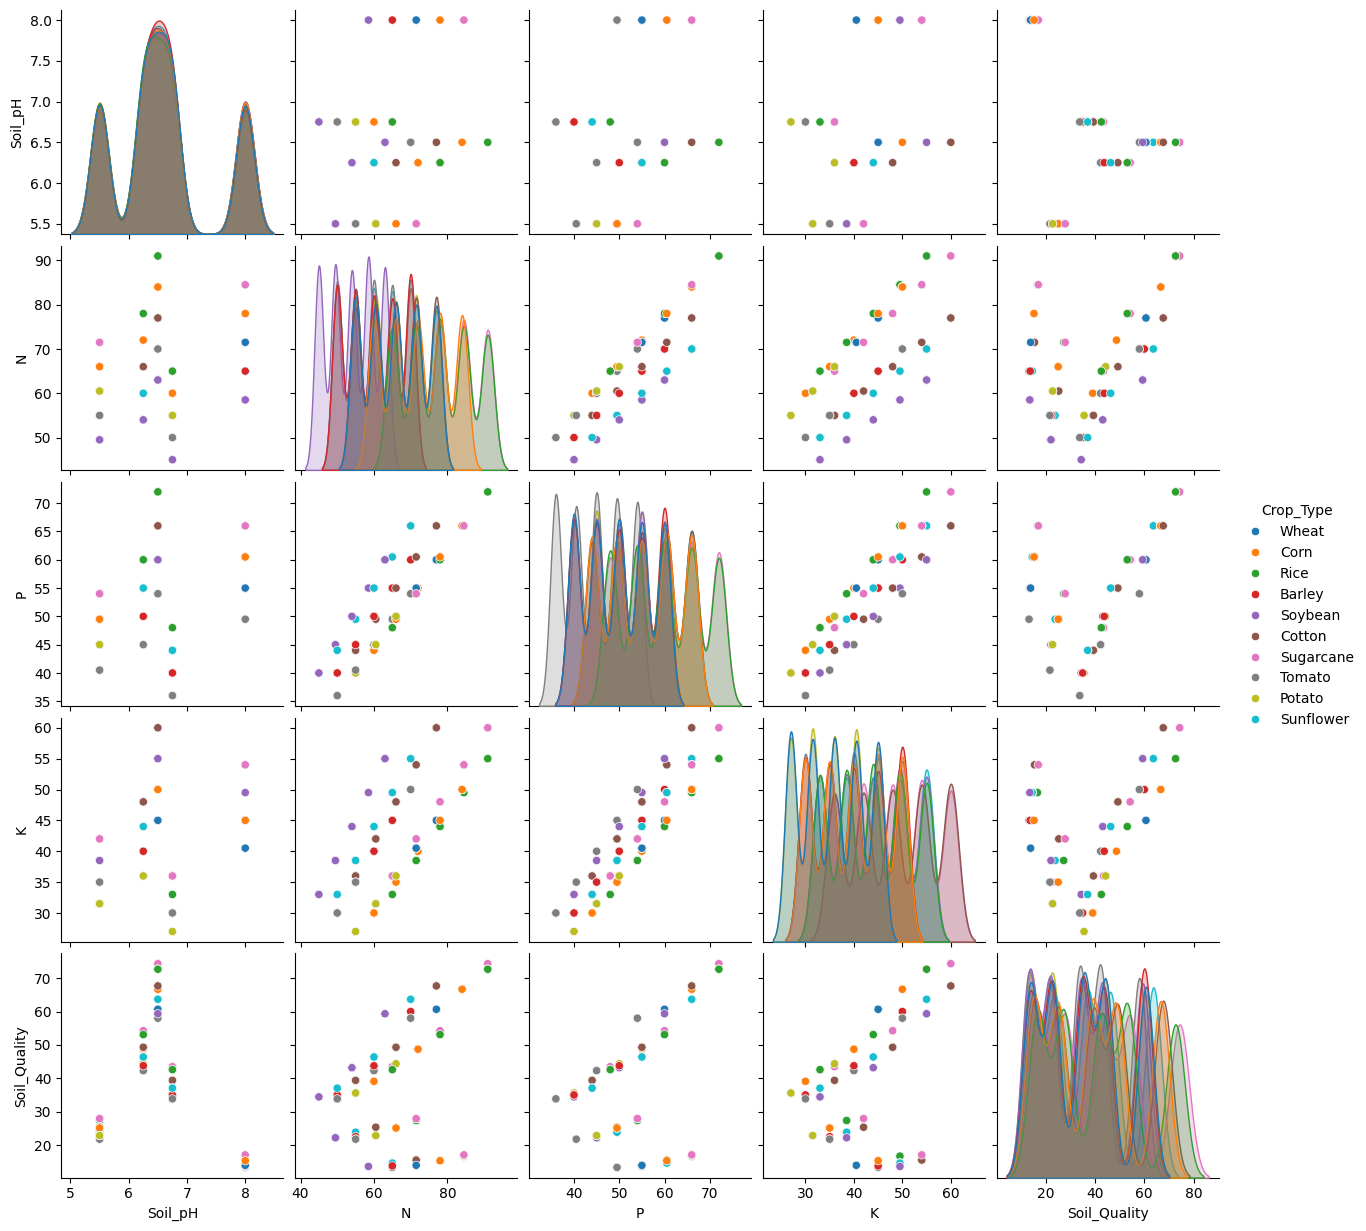

In [43]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df_soiltype_cleaned[['Soil_pH','N','P','K','Soil_Quality','Crop_Type']], hue='Crop_Type')
plt.show()

### Insights from the graph
1. Soil_pH Distribution
   - Most crops are concentrated within the 6.0–7.5 pH range, indicating a preference for slightly acidic to neutral soils.
   - A few crops appear below 5.5 or close to 8.0, but these are less common.
2. Relationships among N, P, and K
   - N ↔ P, N ↔ K, and P ↔ K all show strong positive correlations → soil nutrients tend to increase or decrease together.
   - Some crop groups overlap significantly, suggesting shared soil nutrient requirements.
3. Relationship with Soil_Quality
   - Soil_Quality has a relatively strong correlation with N, P, and K → higher nutrient levels generally result in better soil quality scores.
   - However, distributions vary slightly by crop (e.g., some crops appear even in lower Soil_Quality ranges).
4. Crop-specific Patterns
   - Wheat, Barley, Corn, and Soybean overlap across multiple regions → they can grow under similar soil conditions.
   - Potato, Rice, Cotton, and Sunflower show more distinct patterns, indicating stronger dependence on specific soil characteristics.

5. Crop–soil mapping is possible: N, P, K, and Soil_Quality correlations can help define optimal soil conditions for each crop.

6. Soil pH range matters: Most crops thrive around neutral pH, meaning extreme acidic/alkaline conditions limit crop choice.

7. Alternative crop potential: Overlaps such as Wheat ↔ Barley and Soybean ↔ Corn suggest alternative crop options under similar soil conditions.

8. Targeted strategies required: Crops like Potato and Rice, which depend strongly on specific soil environments, need tailored cultivation strategies

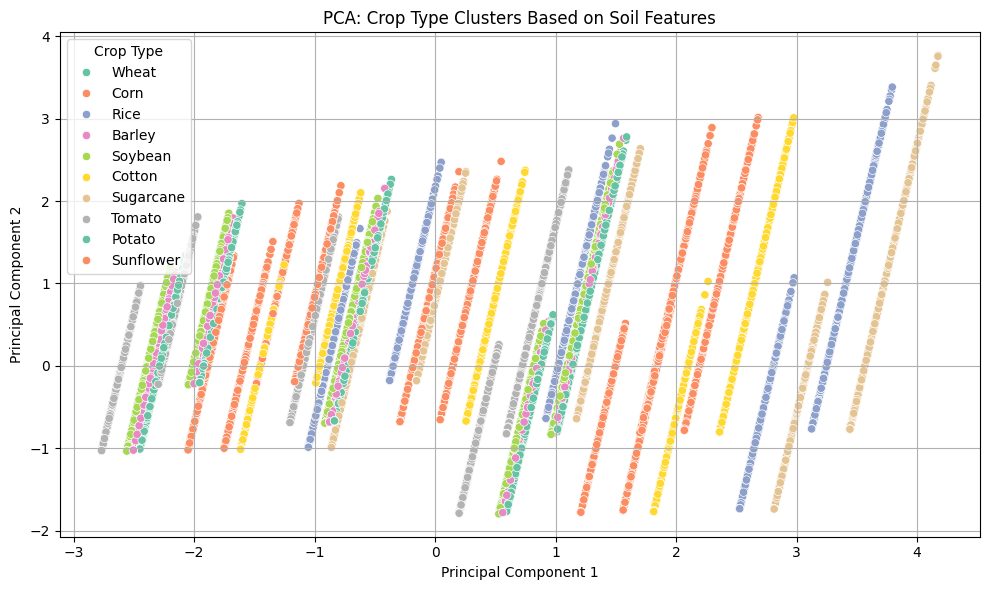

In [44]:
# Select numeric features for PCA
numeric_cols = ['Soil_pH', 'N', 'P', 'K', 'Crop_Yield']

X = df_soiltype[numeric_cols]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (e.g., reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Crop_Type'] = df_soiltype['Crop_Type']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Crop_Type', palette='Set2')
plt.title('PCA: Crop Type Clusters Based on Soil Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Crop Type')
plt.grid(True)
plt.tight_layout()

## Summary Insights
 - N, P, and K are strongly interconnected soil nutrients and tend to move together.
 - Crop yield has weak correlations with N, P, K, and Soil_Quality, indicating that these variables alone are insufficient 
   for strong yield prediction.
 - Soil_pH and time-related variables (Year, Month, Day) show negligible impact on yield.
 - A multivariate analysis approach (regression or machine learning) that incorporates climate and management variables 
   is required to achieve better predictive performance.

### Potential Question for Further Exploration

A key question that could be explored with this dataset is:

**“How do soil properties (pH, N, P, K, and Soil_Quality) and weather conditions influence Crop_Yield, and can we identify alternative crops suitable under similar soil environments?”**

### Justification Based on EDA

1. Crop_Yield distribution
- Initially treated as missing when equal to zero, but EDA showed that zero values carry real meaning (e.g., crop failure or unsuitable soil).
- This highlights the importance of investigating environmental conditions that lead to low or zero yields.
2. Soil nutrients (N, P, K)
- Strong positive correlations among N, P, and K were identified.
- Suggests that fertility management is a key driver of Crop_Yield variation.
3. Soil_Quality
- Closely correlated with nutrient levels → higher nutrient levels generally improve yield.
4. pH influence
- Most crops cluster between pH 6.0–7.5, with poor yields outside this range.
- Indicates pH as a critical threshold factor.
5. Crop overlaps (PCA results)
- Wheat ↔ Barley and Soybean ↔ Corn share similar soil conditions.
- Implies that alternative crop recommendations can be made when one crop underperforms, providing resilience for farmers.

#### Conclusion
The dataset supports research into the relationship between soil/weather factors and crop yield performance, while also enabling exploration of alternative crop planning under similar soil environments. These insights are directly backed by the EDA results, which revealed nutrient correlations, pH sensitivity, and crop clustering patterns.